**1.** Взять датасет из домашнего задания №2 (Данные для ДЗ можете скачать с google диска: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_). Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [2]:
# Загружаем данные через модуль files
from google.colab import files
files.upload()

Saving marketing_campaign.csv to marketing_campaign (1).csv
Saving subscribers.csv to subscribers (1).csv
Saving users.csv to users (1).csv


{'marketing_campaign.csv': b'user_id,date_served,marketing_channel,variant,language_displayed,converted\na1000,1/1/18,House Ads,personalization,English,True\na1001,1/1/18,House Ads,personalization,English,True\na1002,1/1/18,House Ads,personalization,English,True\na1003,1/1/18,House Ads,personalization,English,True\na1004,1/1/18,House Ads,personalization,English,True\na1005,1/1/18,House Ads,personalization,German,True\na1006,1/1/18,House Ads,personalization,English,True\na1007,1/1/18,House Ads,personalization,English,True\na1008,1/1/18,House Ads,personalization,English,True\na1009,1/1/18,House Ads,personalization,English,True\na1010,1/1/18,House Ads,personalization,English,True\na1011,1/1/18,House Ads,personalization,English,True\na1012,1/1/18,House Ads,personalization,Arabic,True\na1013,1/1/18,House Ads,personalization,English,True\na1014,1/1/18,House Ads,personalization,English,True\na1015,1/1/18,House Ads,personalization,Arabic,True\na1016,1/2/18,House Ads,personalization,English,Tru

In [3]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as stats
import numpy as np
from scipy.optimize import Bounds
from scipy.optimize import minimize

In [6]:
# Загружаем данные в Python c помощью библиотеки Pandas
# И склеиваем 3 датасета
df_marketing = pd.read_csv('marketing_campaign.csv', header = 0, sep = ',')
df_subscribers = pd.read_csv('subscribers.csv', header = 0, sep = ',')
df_users = pd.read_csv('users.csv', header = 0, sep = ',')
df = df_marketing.merge(df_subscribers, on='user_id', how='inner').merge(df_users, on='user_id', how='inner')
df.head(10)

user_id date_served marketing_channel          variant language_displayed  \
0   a1000      1/1/18         House Ads  personalization            English   
1   a1001      1/1/18         House Ads  personalization            English   
2   a1002      1/1/18         House Ads  personalization            English   
3   a1003      1/1/18         House Ads  personalization            English   
4   a1004      1/1/18         House Ads  personalization            English   
5   a1005      1/1/18         House Ads  personalization             German   
6   a1006      1/1/18         House Ads  personalization            English   
7   a1007      1/1/18         House Ads  personalization            English   
8   a1008      1/1/18         House Ads  personalization            English   
9   a1009      1/1/18         House Ads  personalization            English   

  converted subscribing_channel date_subscribed date_canceled is_retained  \
0      True           House Ads          1/1/18           NaN        True   
1      True           House Ads          1/1/18           NaN        True   
2      True           House Ads          1/1/18           NaN        True   
3      True           House Ads          1/1/18           NaN        True   
4      True           House Ads          1/1/18           NaN        True   
5      True           House Ads          1/1/18           NaN        True   
6      True           House Ads          1/1/18           NaN        True   
7      True           House Ads          1/1/18           NaN        True   
8      True           House Ads          1/1/18           NaN        True   
9      True           House Ads          1/1/18           NaN        True   

     age_group language_preferred  
0   0-18 years            English  
1  19-24 years            English  
2  24-30 years            English  
3  30-36 years            English  
4  36-45 years            English  
5  45-55 years             German  
6    55+ years            English  
7   0-18 years            English  
8  19-24 years            English  
9  24-30 years            English

In [7]:
# создаем таблицу сопряженности на основе результатов A/B-теста
data1 = df.groupby('variant')['converted'].value_counts().unstack()
data1.head()

converted        False  True
variant                     
control           4705   371
personalization   4241   705

In [8]:
result = stats.chi2_contingency(data1, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 126.07767827548582, pvalue = 2.9568009705199523e-29


Получается что в personalization конверсия выше. И это статистически значимо.

**2.** Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [9]:
def value(x):
  return -45*x[0] - 80*x[1]

neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5*x[0] - 20*x[1],
                                         450 - 10*x[0] - 15*x[1]])}

bnds = Bounds([0, 0], [np.inf, np.inf])

x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


Чтобы получить максимальную прибыль мы должны сделать: стульев - 24 шт., столов - 14 шт.

**3.** Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 - 0.4$, day3 - 0.6$, day7 - 0.8$, day14 - 1.10$ , day21 - 1.30$, day30 - 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = a*b^x или y = a*ln(x) + b.

In [10]:
df = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'retained': [0.4,0.6,0.8,1.10,1.30,1.40]})
df.head(6)

day  retained
0    1       0.4
1    3       0.6
2    7       0.8
3   14       1.1
4   21       1.3
5   30       1.4

In [11]:
# задаем аппроксимирующую логарифмическую функцию
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [12]:
# задаем аппроксимирующую экспоненциальную функцию
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c


In [13]:
# подбираем оптимальные параметры логарифмической функции
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df['day'], df['retained'])

In [14]:
# подбираем оптимальные параметры экспоненциальной функции
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['retained'])

In [15]:
# задаем точку прогноза - сколько денег будет на 90й день
projection_endpoint = 90

In [16]:
# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

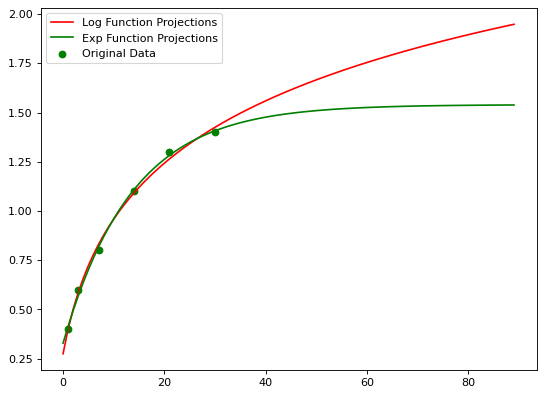

In [27]:
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['retained'], label="Original Data", color='green')
plt.plot( log_y_projected, label="Log Function Projections", color='red')
plt.plot( exp_y_projected, label="Exp Function Projections", color='green')
plt.legend()
plt.show()

In [28]:
# делаем прогноз удержанных пользователей сайта на 90й день
print('Прогноз кол-ва принесенных денег через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва принесенных денег через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз кол-ва принесенных денег через 90 дней по log модели 2.0
Прогноз кол-ва принесенных денег через 90 дней по exp модели 2.0
